# Figures for the Paper

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["figure.dpi"] = 150

%load_ext autoreload
%autoreload 2

## introduction

### dataset examples

In [3]:
from deton8.visualization import plot_grid
from deton8.utils import NucleiDataset

In [4]:
raw_train = NucleiDataset(directory="../data/training/", invert_white_images=False)
train = NucleiDataset(directory="../data/training/")
raw_train.load(max_size=50)

In [5]:
raw_metadata = raw_train.metadata_
raw_ims = raw_train.images_
masks = raw_train.masks_

In [10]:
gridsize = (4,6)
indices = np.random.choice(np.arange(len(raw_ims)), size=np.prod(gridsize), replace=False)
plot_ims = raw_ims[indices]
plot_masks = masks[indices]

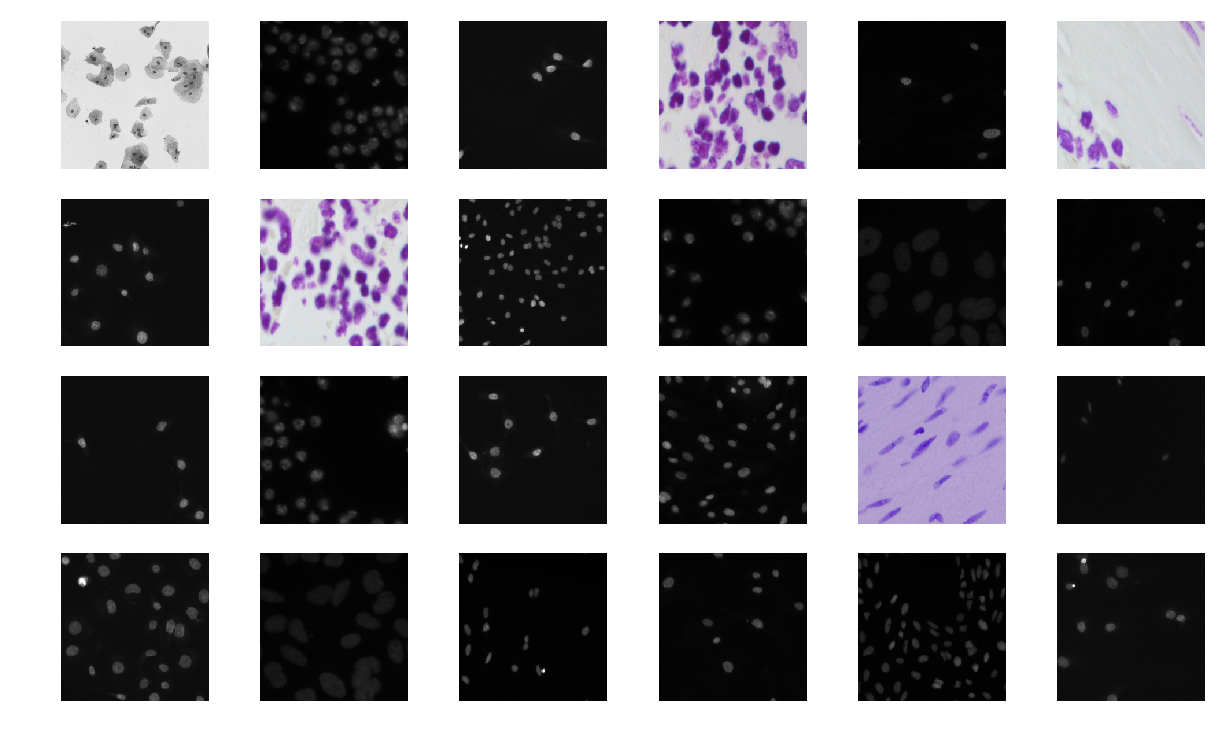

In [13]:
fig = plot_grid(plot_ims, title="", gridsize=(4, 6))
plt.savefig("../paper/figs/dsbowl18-imagegrid-4x6.png", dpi=150)
plt.show()

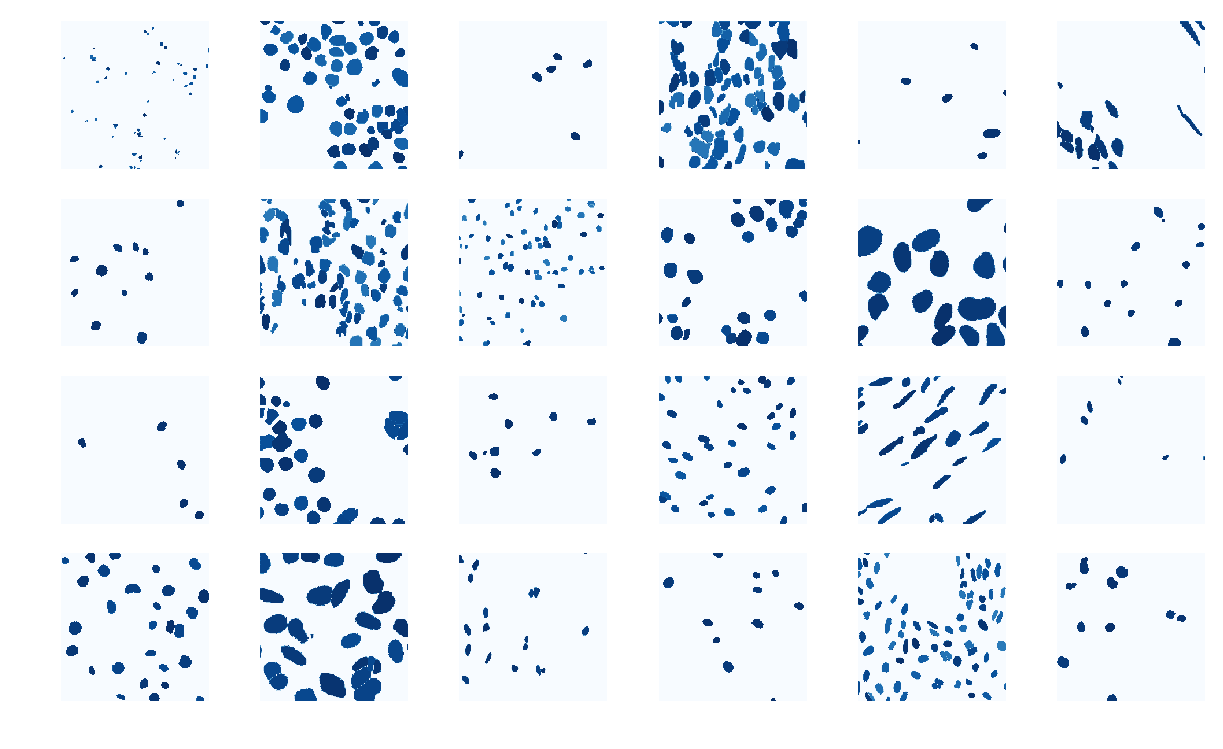

In [26]:
fig = plot_grid(plot_masks, title="", gridsize=(4, 6), cmap='Blues')
plt.savefig("../paper/figs/dsbowl18-imagegrid-masks-4x6.png", dpi=150)
plt.show()

## methods

In [6]:
train.load(max_size=300)
images = train.images_
metadata = train.metadata_
masks = train.masks_

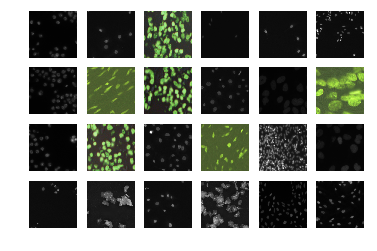

In [7]:
fig = plot_grid(images[:24], title="", gridsize=(4, 6))
plt.show()

In [8]:
style_inds = np.array([16, 5, 20, 23])

### color transfer / pca

In [9]:
from sklearn.decomposition import PCA
from deton8.computer_vision import ColorMatcher

In [10]:
cm = ColorMatcher()
styled = cm.fit_transform(images[style_inds], images)

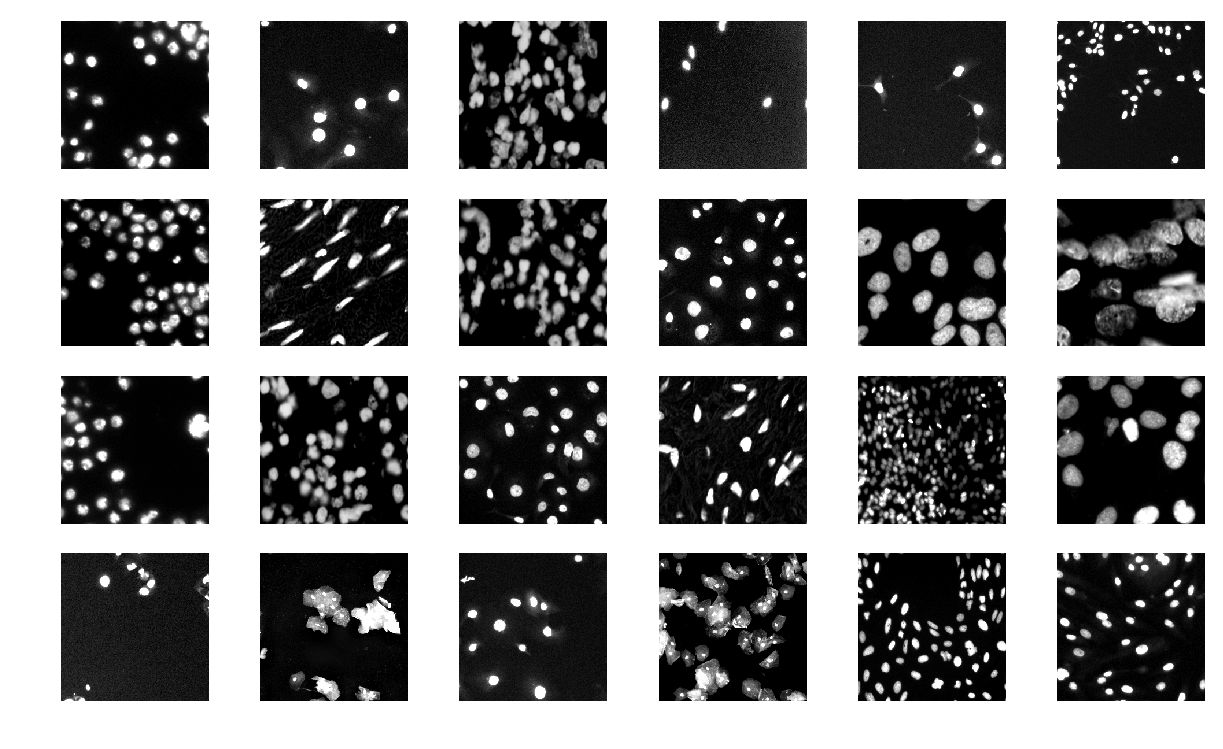

In [44]:
fig = plot_grid(styled[:24], title="", gridsize=(4, 6))
plt.show()

In [12]:
style_data = images[style_inds].reshape((-1, 3))

In [12]:
im_data = images.reshape((-1, 3))

In [13]:
from mpl_toolkits.mplot3d import Axes3D

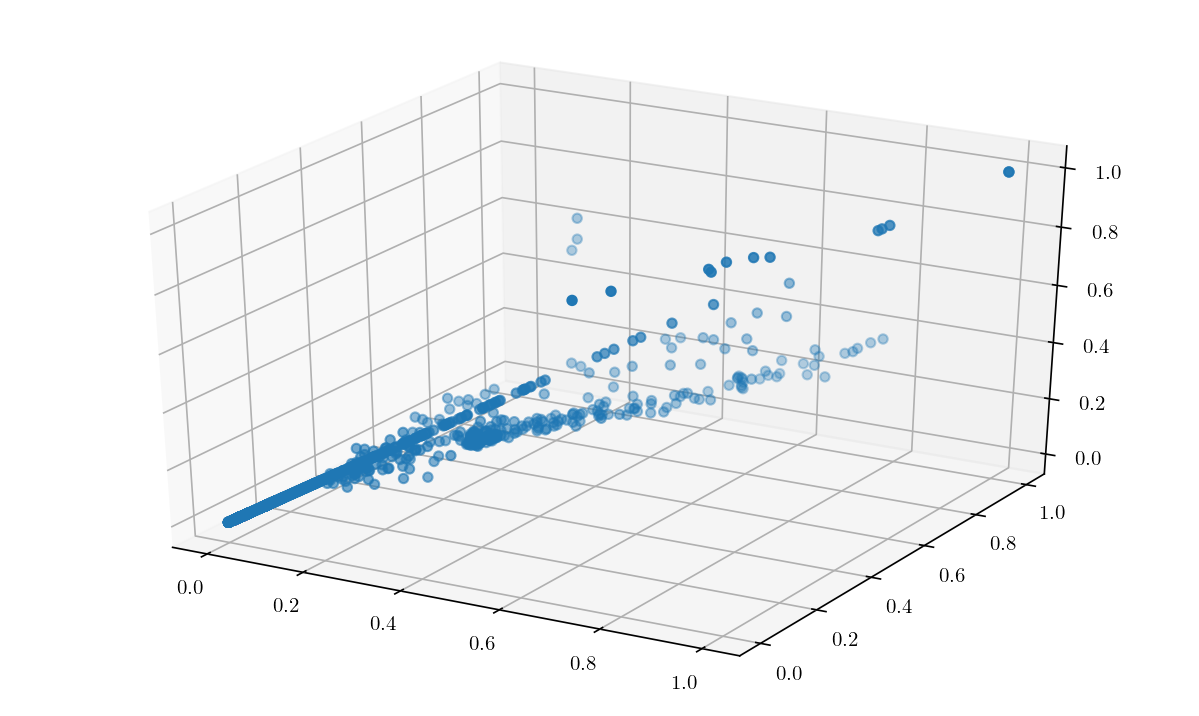

In [69]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(*im_data[::10000].T)
plt.savefig("../paper/figs/correlated-features.png")
plt.show()

In [27]:
small_im_data = images[:20].reshape((-1, 3))

In [65]:
pca = PCA(n_components=1, svd_solver='randomized', whiten=True)
whitened = pca.fit_transform(small_im_data)

In [66]:
wr = whitened.reshape((20, 256, 256, 1))

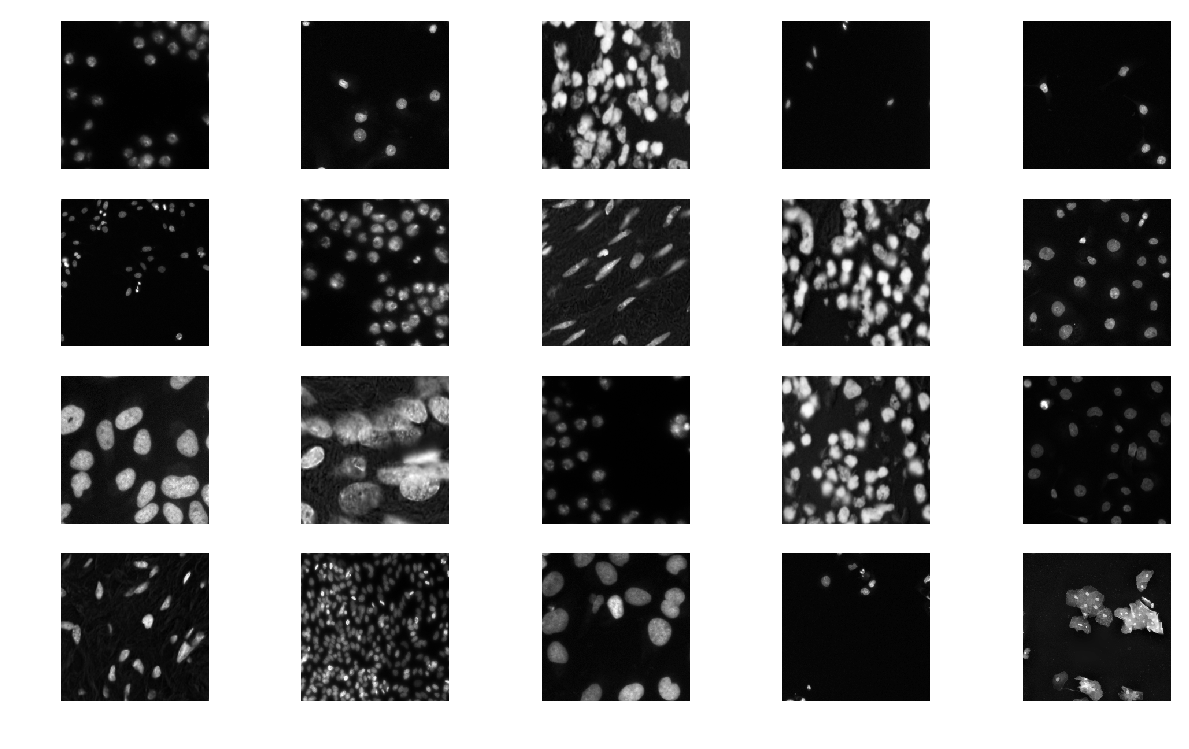

In [72]:
fig = plot_grid(wr[:, :, :, 0], title="", gridsize=(4, 5), cmap='gray')
plt.show()

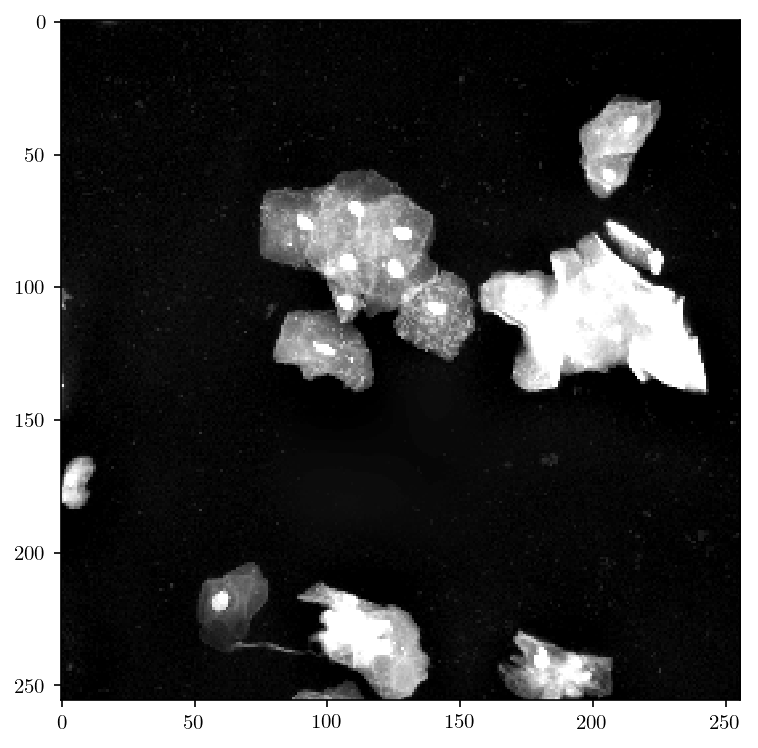

In [59]:
plt.imshow(styled[19])

In [1]:
from deton8.pipeline import LinearPipeline

/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/gvacaliuc/.virtualenvs/ml3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
lp = LinearPipeline()

In [9]:
ims = np.random.random((10, 32, 32, 1))

In [3]:
from deton8.analytical import BasisTransformer

In [16]:
trans = BasisTransformer().fit_transform(ims)

100%|██████████| 10/10 [00:00<00:00, 68.67pair/s]

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
